#CVD Prediction Model using hybrid machine learning with feature selection

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
df= pd.read_csv('heart.csv')

#Data Filtering

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
#checking whether our dataset has any null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Balance Graph of variable 'target':


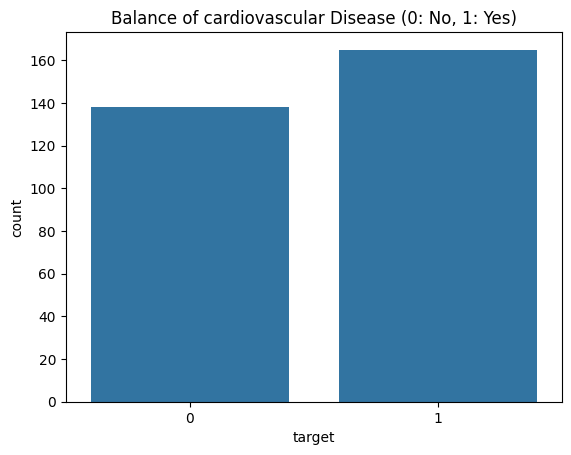

In [8]:
#Checking the balance between values of the target variable 'target'
print("\nBalance Graph of variable 'target':")
sns.countplot(x='target', data=df)
plt.title('Balance of cardiovascular Disease (0: No, 1: Yes)')
plt.show()


Age Balance:


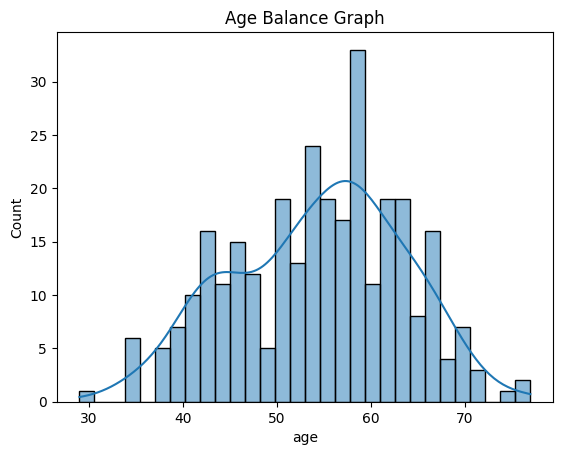

In [9]:
#Age Balance
print("\nAge Balance:")
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Balance Graph')
plt.show()


Gender Balance:


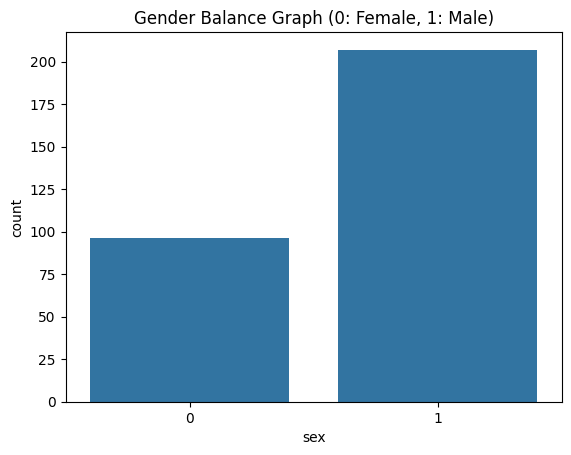

In [10]:
# Gender Variable Balance
print("\nGender Balance:")
sns.countplot(x='sex', data=df)
plt.title('Gender Balance Graph (0: Female, 1: Male)')
plt.show()


Correlation matrix:


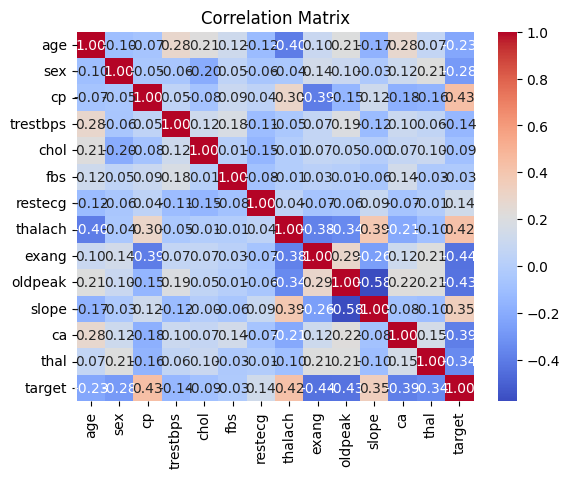

In [11]:
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#Training the model on all features (random forest classifier algo)

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = RandomForestClassifier(random_state=42)


In [15]:
# Standardize scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
classification_rep = classification_report(y_test, y_pred)

In [20]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.84
Confusion Matrix:
[[24  5]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#feature selection, splitting dataset and scaling it !!

In [21]:
#importing important libraries
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [22]:
#splitting input and output data
a = df.drop('target',axis=1)
b = df['target']
new_b = b

In [23]:
#ranking features with Recursive feature elemination method with dicision tree classifier
hardf = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=8)
hardf = hardf.fit(a,b)

In [24]:
#printing the features with rank thorough a loop where hardex is index and anny is column
for hardex, anny in zip(range(a.shape[1]),a.columns):
  print(f"{anny} selected={hardf.support_[hardex]} rank={hardf.ranking_[hardex]}")

age selected=True rank=1
sex selected=False rank=2
cp selected=True rank=1
trestbps selected=True rank=1
chol selected=True rank=1
fbs selected=False rank=6
restecg selected=False rank=5
thalach selected=True rank=1
exang selected=False rank=4
oldpeak selected=True rank=1
slope selected=False rank=3
ca selected=True rank=1
thal selected=True rank=1


In [25]:
#storing selected features from a to new_a named variable also there is no need to change the b dataframe
new_a = a.loc[:, hardf.support_]
#but to make the understanding clear i will store it in a new new_b named variable at the 135'th line
# now we have two variables new_a and new_b which is filtered out with feature selection let's gooooooo

splitting the data

In [26]:
# Spliting the dataset new a and new b into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(new_a,new_b, test_size=0.2, random_state=42)

scaling the data

In [27]:
# Standardize scaling the features
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

#training the model with random forest algo

In [28]:
#initialising the new classifier
#using maxdepth and total tress in forest as 50 for hypertunning
new_clf = RandomForestClassifier(n_estimators=50, max_depth=10,random_state=42)

In [29]:
new_clf.fit(a_train, b_train)

RandomForestClassifier(random_state=42)

In [30]:
# Making predictions on the test set
b_pred = new_clf.predict(a_test)

In [31]:
#calculating the accuracy for the new model
rand_accuracy = accuracy_score(b_test, b_pred)
rand_conf_matrix = confusion_matrix(b_test, b_pred)
rand_classification_rep = classification_report(b_test, b_pred)

In [32]:
#printing the accuracy and confusion matrix
print(f"Accuracy: {rand_accuracy:.2f}")
print("Confusion Matrix:")
print(rand_conf_matrix)
print("Classification Report:")
print(rand_classification_rep)

Accuracy: 0.82
Confusion Matrix:
[[22  7]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#Traing the model again with (logisitic regression algo)

In [33]:
logi = LogisticRegression(max_iter=1000,random_state=42,)
logi.fit(a_train, b_train)
logi_pred = logi.predict(a_test)


In [34]:
#calculating the accuracy for the logistic model
logi_accuracy = accuracy_score(b_test, logi_pred)
logi_conf_matrix = confusion_matrix(b_test, logi_pred)
logi_classification_rep = classification_report(b_test, logi_pred)

In [35]:
#printing the accuracy and confusion matrix
print(f"Accuracy: {logi_accuracy:.2f}")
print("Confusion Matrix:")
print(logi_conf_matrix)
print("Classification Report:")
print(logi_classification_rep)

Accuracy: 0.85
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#Training the model with Gradient Boosting Algo

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

boos = GradientBoostingClassifier(random_state=42)
boos.fit(a_train, b_train)
boos_pred = boos.predict(a_test)


In [37]:
#calculating the accuracy for the logistic model
boos_accuracy = accuracy_score(b_test, boos_pred)
boos_conf_matrix = confusion_matrix(b_test, boos_pred)
boos_classification_rep = classification_report(b_test, boos_pred)

In [38]:
#printing the accuracy and confusion matrix
print(f"Accuracy: {boos_accuracy:.2f}")
print("Confusion Matrix:")
print(boos_conf_matrix)
print("Classification Report:")
print(boos_classification_rep)

Accuracy: 0.80
Confusion Matrix:
[[24  5]
 [ 7 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



#Training the model with Neural Networks algo

In [39]:
neu = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
neu.fit(a_train, b_train)
neu_pred = neu.predict(a_test)


C:\Users\theha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
#calculating the accuracy for the logistic model
neu_accuracy = accuracy_score(b_test, neu_pred)
neu_conf_matrix = confusion_matrix(b_test, neu_pred)
neu_classification_rep = classification_report(b_test, neu_pred)

In [41]:
#printing the accuracy and confusion matrix
print(f"Accuracy: {neu_accuracy:.2f}")
print("Confusion Matrix:")
print(neu_conf_matrix)
print("Classification Report:")
print(neu_classification_rep)

Accuracy: 0.85
Confusion Matrix:
[[24  5]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#combining all of them to make an ensembled/hybrid model

In [42]:
#assembling models with voting classifier
models_assemble = VotingClassifier(
    estimators=[
        ('rand', new_clf),
        ('neural',neu),
        ('gb',boos),

    ],
    voting='hard'
)
models_assemble.fit(a_train, b_train)
assemble_pred = models_assemble.predict(a_test)

C:\Users\theha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
#caluculating accuracy of this hybrid model
assemble_accuracy = accuracy_score(b_test, assemble_pred)
assemble_conf_matrix = confusion_matrix(b_test, assemble_pred)
assemble_classification_rep = classification_report(b_test, assemble_pred)

In [44]:
#printing the accuracy and confusion matrix
print(f"Accuracy: {assemble_accuracy:.2f}")
print("Confusion Matrix:")
print(assemble_conf_matrix)
print("Classification Report:")
print(assemble_classification_rep)

Accuracy: 0.84
Confusion Matrix:
[[23  6]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



#Final Report

In [45]:
print("Training the model on all features (random forest classifier algo)\n without feature selection and scaling the dataset \n")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print("\n\n NOW THE MODELS WILL BE TRAINED WITH ONLY 8 FEATURES ON A SCALED DATASET \n\n")

print("\n Training the model on random forest algo\n")
print(f"Accuracy: {rand_accuracy:.2f}")
print("Confusion Matrix:")
print(rand_conf_matrix)
print("Classification Report:")
print(rand_classification_rep)

print("\n Training the model on logistic regression algo\n")
print(f"Accuracy: {logi_accuracy:.2f}")
print("Confusion Matrix:")
print(logi_conf_matrix)
print("Classification Report:")
print(logi_classification_rep)

print("\n Training the model on gradient boosting algo\n")
print(f"Accuracy: {boos_accuracy:.2f}")
print("Confusion Matrix:")
print(boos_conf_matrix)
print("Classification Report:")
print(boos_classification_rep)

print("\n Training the model on neural networks algo\n")
print(f"Accuracy: {neu_accuracy:.2f}")
print("Confusion Matrix:")
print(neu_conf_matrix)
print("Classification Report:")
print(neu_classification_rep)

print("\n Training the model on hybrid model \n (randomforest,Gradiant_boosting,neural_network)\n")
print(f"Accuracy: {assemble_accuracy:.2f}")
print("Confusion Matrix:")
print(assemble_conf_matrix)
print("Classification Report:")
print(assemble_classification_rep)

Training the model on all features (random forest classifier algo)
 without feature selection and scaling the dataset 

Accuracy: 0.84
Confusion Matrix:
[[24  5]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



 NOW THE MODELS WILL BE TRAINED WITH ONLY 8 FEATURES ON A SCALED DATASET 



 Training the model on random forest algo

Accuracy: 0.82
Confusion Matrix:
[[22  7]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted 

In [46]:
#Saving The Model For Further Use
import joblib
joblib.dump(models_assemble, 'model1167.pkl')

['model1167.pkl']

This Model is Created by Onkar Chaturvedi
follow us on github:-
https://github.com/onkarchaturvedi

follow us on Instagram:-
https://instagram.com/harrysment

follow us on youtube for fun:-
https://youtube.com/@harrysment

follow us on youtube for more tech content-
https://youtube.com/@harrysmentlive